# Neural Network Assignment

# The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
#### The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

## Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

# Importing necessary packages


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV,train_test_split,KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv('D:\\Data sets\\gas_turbines.csv')
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# performing the basic EDA functions 

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
data.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [5]:
data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
#No duplicate values present in the dataset
data[data.duplicated( keep ="first")]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


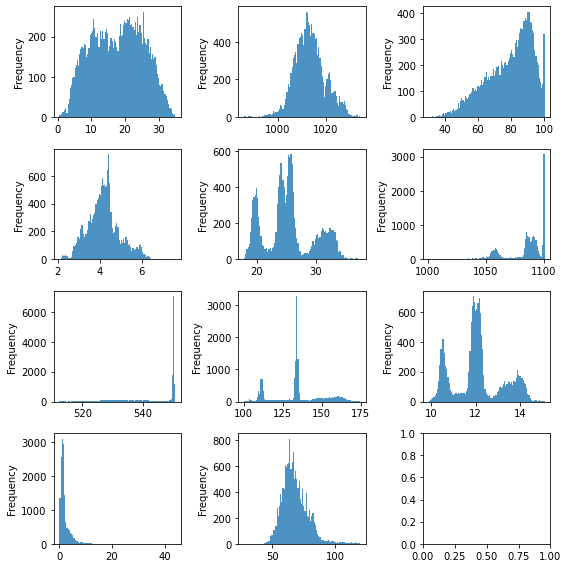

In [7]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(8, 8))

# plot to different axes
data.AT.plot.hist(bins=100, alpha=0.8, ax=ax[0, 0])
data.AP.plot.hist(bins=100, alpha=0.8, ax=ax[0, 1])
data.AH.plot.hist(bins=100, alpha=0.8, ax=ax[0, 2])
data.AFDP.plot.hist(bins=100, alpha=0.8, ax=ax[1, 0])
data.GTEP.plot.hist(bins=100, alpha=0.8, ax=ax[1, 1])
data.TIT.plot.hist(bins=100, alpha=0.8, ax=ax[1, 2])
data.TAT.plot.hist(bins=100, alpha=0.8, ax=ax[2, 0])
data.TEY.plot.hist(bins=100, alpha=0.8, ax=ax[2, 1])
data.CDP.plot.hist(bins=100, alpha=0.8, ax=ax[2, 2])
data.CO.plot.hist(bins=100, alpha=0.8, ax=ax[3, 0])
data.NOX.plot.hist(bins=100, alpha=0.8, ax=ax[3, 1])
plt.tight_layout()
plt.show()

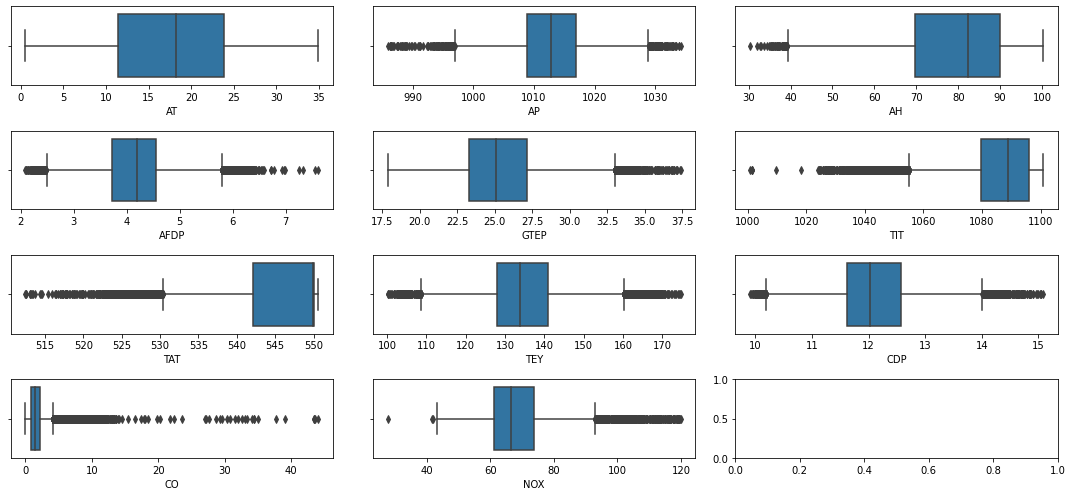

In [8]:
import warnings
warnings.filterwarnings("ignore")
#We will check the outliers in the dataset
fig, ax = plt.subplots(4, 3, figsize=(15,7))
sns.boxplot(data.AT, ax=ax[0,0])
sns.boxplot(data.AP, ax=ax[0,1])
sns.boxplot(data.AH, ax=ax[0,2])
sns.boxplot(data.AFDP, ax=ax[1,0])
sns.boxplot(data.GTEP, ax=ax[1,1])
sns.boxplot(data.TIT, ax=ax[1,2])
sns.boxplot(data.TAT, ax=ax[2,0])
sns.boxplot(data.TEY, ax=ax[2,1])
sns.boxplot(data.CDP, ax=ax[2,2])
sns.boxplot(data.CO, ax=ax[3,0])
sns.boxplot(data.NOX, ax=ax[3,1])
plt.tight_layout()
plt.show()

<AxesSubplot:>

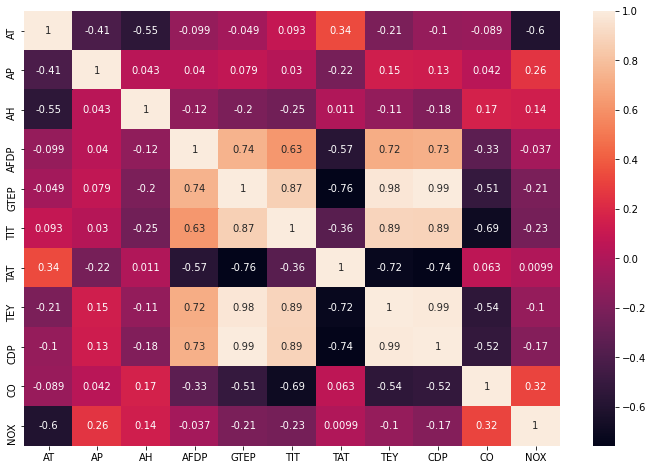

In [9]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.heatmap(data.corr(),annot=True)

# performing the normalization on the data set 

In [41]:
scale=MinMaxScaler()
data1=pd.DataFrame(scale.fit_transform(data),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX','TEY'])
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [42]:
x=data1.iloc[:,0:-1]
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647
...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693


In [43]:
y=data1.iloc[:,-1]
y

0        0.596548
1        0.597134
2        0.593791
3        0.595984
4        0.592087
           ...   
15034    0.562214
15035    0.566100
15036    0.685449
15037    0.710578
15038    0.702665
Name: TEY, Length: 15039, dtype: float64

# Developing the model of Neural Network

In [44]:
model=Sequential()
model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(12,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='linear'))

In [45]:
history=model.compile(loss='mse', optimizer='adam')

In [46]:
history=model.fit(x, y, validation_split=0.33,epochs=100, batch_size=50)

Epoch 1/100
202/202 [==============================] - 2s 3ms/step - loss: 0.1407 - val_loss: 0.0170
Epoch 2/100
202/202 [==============================] - 1s 3ms/step - loss: 0.0139 - val_loss: 0.0146
Epoch 3/100
202/202 [==============================] - 1s 3ms/step - loss: 0.0110 - val_loss: 0.0119
Epoch 4/100
202/202 [==============================] - 1s 3ms/step - loss: 0.0093 - val_loss: 0.0092
Epoch 5/100
202/202 [==============================] - 1s 3ms/step - loss: 0.0082 - val_loss: 0.0071
Epoch 6/100
202/202 [==============================] - 1s 3ms/step - loss: 0.0067 - val_loss: 0.0057
Epoch 7/100
202/202 [==============================] - 1s 3ms/step - loss: 0.0057 - val_loss: 0.0049
Epoch 8/100
202/202 [==============================] - 1s 3ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 9/100
202/202 [==============================] - 1s 3ms/step - loss: 0.0046 - val_loss: 0.0039
Epoch 10/100
202/202 [==============================] - 1s 3ms/step - loss: 0.0041 - val_lo

In [47]:
score=model.evaluate(x,y)

470/470 [==============================] - 1s 2ms/step - loss: 0.0026


In [48]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

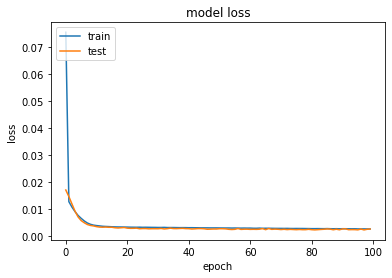

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()